# Tarea 13

__Ejercicio 1:__ Resolver oscilador amortiguado:
$$m \ddot x=-k x -b \dot x,$$
usando $m=k=b=1$ y $x_0=1$, $\dot x_0=0$.
Usen Euler Y Runge-Kutta orden 4, comparen las soluciones, es decir, grafiquen el espacio de fase para cada método y despues juntos.
__Nota:__ El método de Runge-Kutta esta dentro de la familia de métodos simplécticos, es decir, preserva el volumen en el espacio de fase, algo particularmente útil cuanto tenemos sistemas que conservan la energia, a diferencia de _Euler_ que no lo hace. Observen que al no haber cantidades conservadas para el oscilador amortiguado, Euler funcione mucho mejor que en el otro caso, pues el oscilador amortiguado no conserva el volumen del espacio de fase.

In [2]:
using PyPlot;
plt = PyPlot;
using SymPy;

In [3]:
function metodo_RK4_2(f,g,CI,listh)
    #listh = linspace(t0,tf,(tf-t0)/h)
    x=CI[1]
    u=CI[2]
    Sx = []
    Su = []
    h = (last(listh)-listh[1])/length(listh)
    for i in listh
        m1 = f(x,u,i)
        k1 = g(x,u,i)
        m2 = f(x+ (h/2.)*m1,u+ (h/2.)*k1, i+h/2.)
        k2 = g(x+ (h/2.)*m1,u+ (h/2.)*k1, i+h/2.)
        m3 = f(x+ (h/2.)*m2,u+ (h/2.)*k2, i+h/2.)
        k3 = g(x+ (h/2.)*m2,u+ (h/2.)*k2, i+h/2.)
        m4 = f(x+ h*m3,u+ h*k3, i+h)
        k4 = g(x+ h*m3,u+ h*k3, i+h)
        
        x = x + (h/6.)*(m1 + 2.*m2 + 2.*m3 + m4)
        u = u + (h/6.)*(k1 + 2.*k2 + 2.*k3 + k4)
        push!(Sx,x)
        push!(Su,u)
    end
    listh, Sx, Su
end

metodo_RK4_2 (generic function with 1 method)

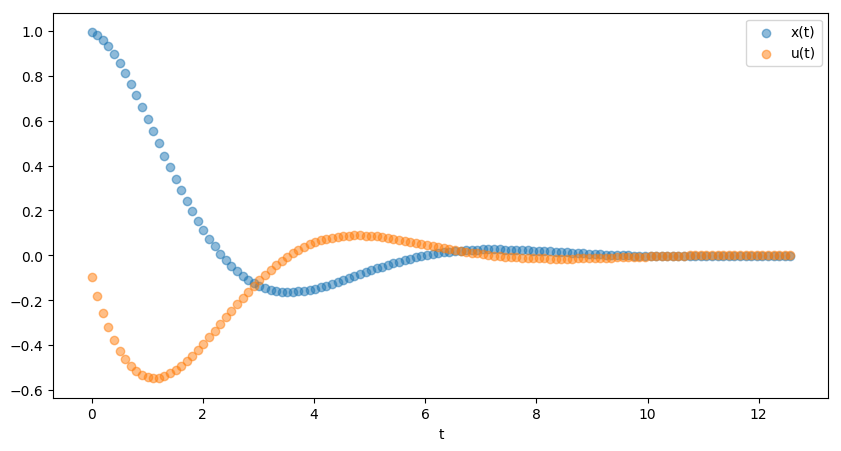

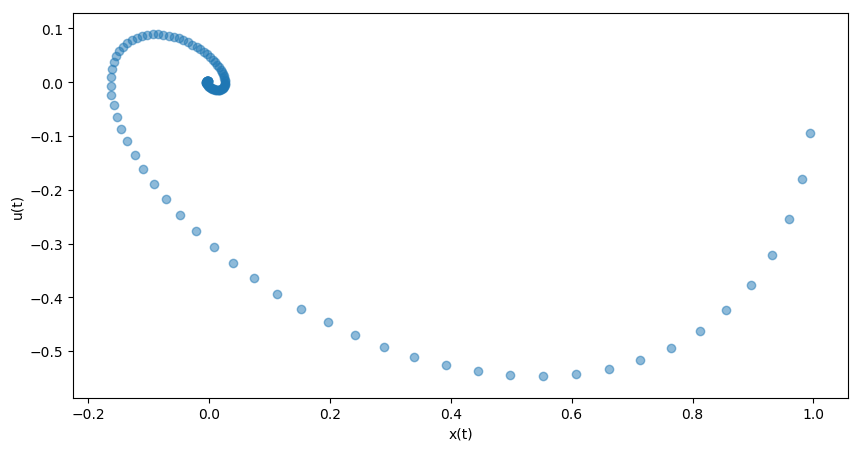

In [8]:
R1,R2,R3=metodo_RK4_2((x,u,i)->u, (x,u,i)->-x-u, (1,0), linspace(0,4pi,126))
plt.figure(figsize=(10,5))
plt.scatter(R1,R2,alpha=0.5, label="x(t)")
plt.scatter(R1,R3,alpha=0.5, label="u(t)")
plt.xlabel("t")
plt.legend()

plt.figure(figsize=(10,5))
plt.scatter(R2,R3,alpha=0.5)#, label="x(t)")
plt.xlabel("x(t)")
plt.ylabel("u(t)")
plt.legend()

In [5]:
function metodo_euler_2(f,g,CI,listh) #CI es arreglo con condiciones iniciales
    #listh = linspace(t0,tf,(tf-t0)/h)
    x=CI[1]
    u=CI[2]
    Sx = []
    Su = []
    h = (last(listh)-listh[1])/length(listh)
    for i in listh
        x = x + h*f(x,u,i)
        u = u + h*g(x,u,i)
        push!(Sx,x)
        push!(Su,u)
    end
    listh, Sx, Su
end;

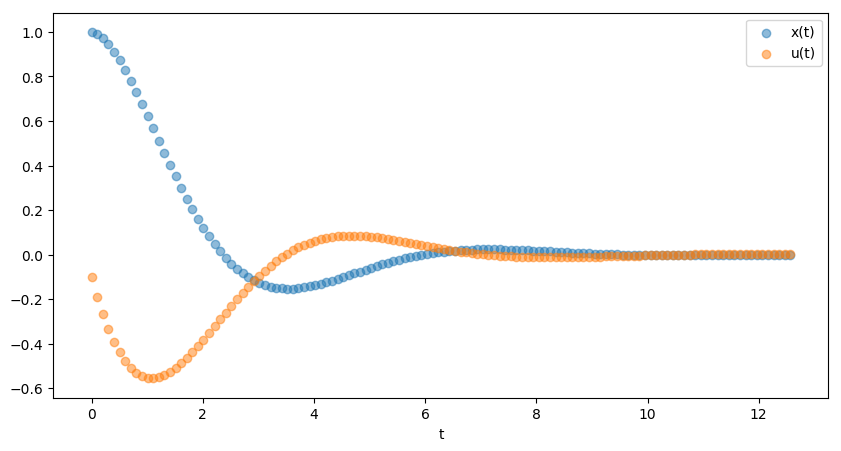

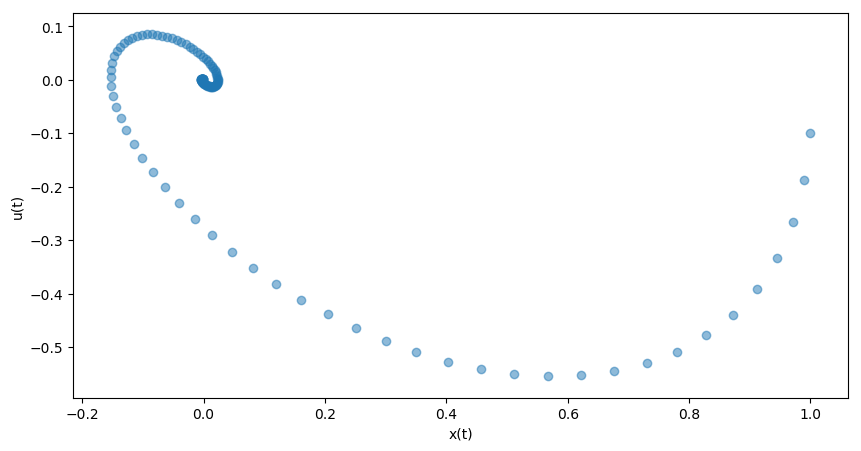

In [6]:
E1,E2,E3=metodo_euler_2((x,u,i)->u, (x,u,i)->-x-u, (1,0), linspace(0,4pi,126))
plt.figure(figsize=(10,5))
plt.scatter(E1,E2,alpha=0.5, label="x(t)")
plt.scatter(E1,E3,alpha=0.5, label="u(t)")
plt.xlabel("t")
plt.legend()

plt.figure(figsize=(10,5))
plt.scatter(E2,E3,alpha=0.5)#, label="x(t)")
plt.xlabel("x(t)")
plt.ylabel("u(t)")
plt.legend()

### Comparación

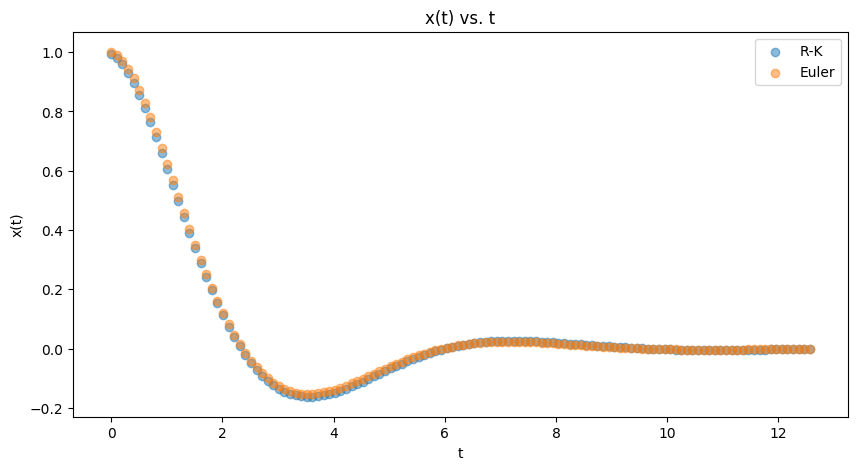

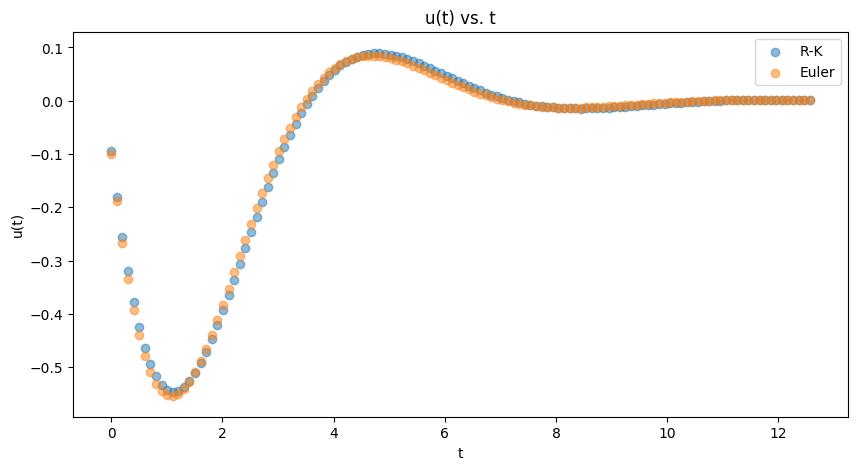

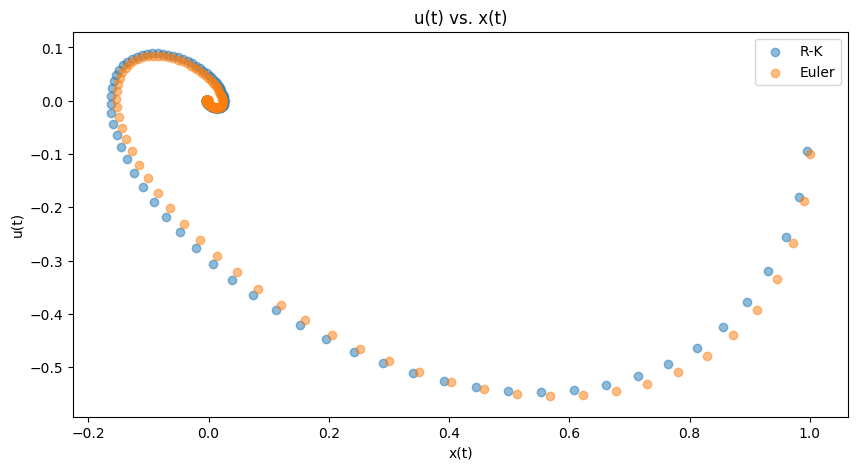

PyObject <matplotlib.legend.Legend object at 0x1387d3a10>

In [7]:
plt.figure(figsize=(10,5))
plt.scatter(R1,R2,alpha=0.5, label="R-K")
plt.scatter(E1,E2,alpha=0.5, label="Euler")
plt.title("x(t) vs. t")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend()

plt.figure(figsize=(10,5))
plt.scatter(R1,R3,alpha=0.5, label="R-K")
plt.scatter(E1,E3,alpha=0.5, label="Euler")
plt.title("u(t) vs. t")
plt.xlabel("t")
plt.ylabel("u(t)")
plt.legend()

plt.figure(figsize=(10,5))
plt.scatter(R2,R3,alpha=0.5, label="R-K")
plt.scatter(E2,E3,alpha=0.5, label="Euler")
plt.title("u(t) vs. x(t)")
plt.xlabel("x(t)")
plt.ylabel("u(t)")
plt.legend()

__Ejercicio 2:__ Resolver el péndulo simple:
$$l \ddot\theta=-g \sin(\theta),$$
usando Runge-Kutta orden 4. Gráficar muchas condiciones iniciales (lo mas facil es que sean aleatorias) en el espacio de fase usando $l=g=1$. Ajuste el rango de la gráfica para que se centre cerca del cero para que se puedan observar los dos tipos de movimiento presentes. Coménte e interprete las soluciones.

In [42]:
rB = rand(80)
B = 10*rB
C = -B
D = []
for i in B
    push!(D,i)
end
for i in C
    push!(D,i)
end

X = (-2pi,0,2pi)

(-6.283185307179586, 0, 6.283185307179586)

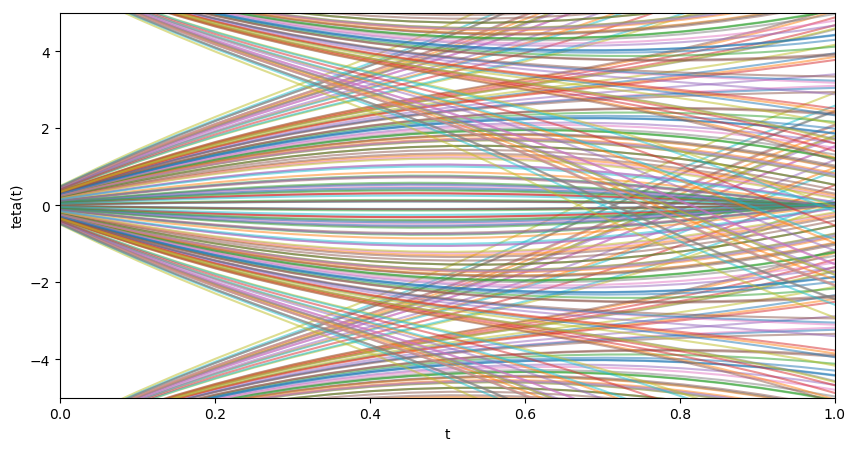

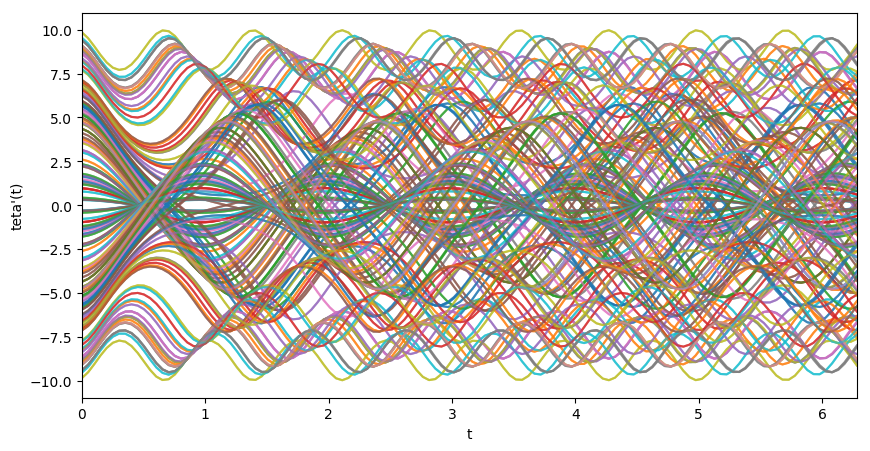

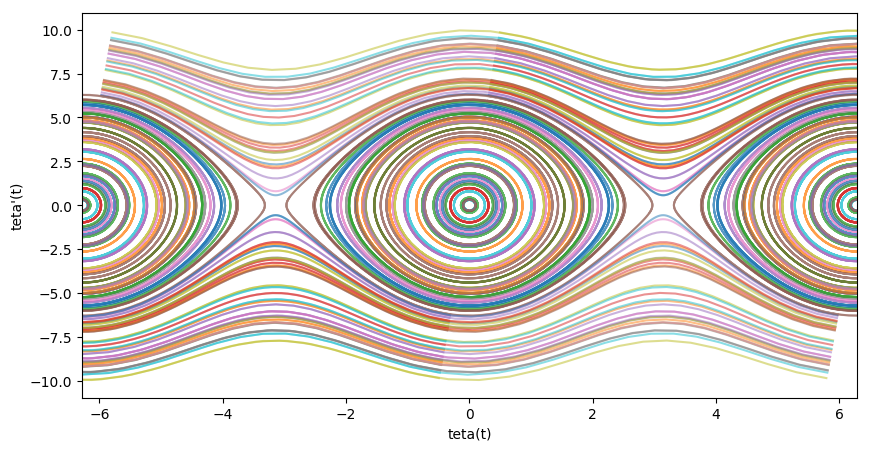

In [43]:
plt.figure(figsize=(10,5))
for j in X
    for i in D
        R1,R2,R3=metodo_RK4_2((x,u,i)->u, (x,u,i)->-10sin(x), (j,i), linspace(0,2pi,126))
        plt.plot(R1,R2,alpha=0.5, label="teta(t)")
        plt.xlabel("t")
        plt.ylabel("teta(t)")
        plt.xlim((0,1))
        plt.ylim((-5,5))
    end
end
plt.figure(figsize=(10,5))
for j in X
    for i in D
        R1,R2,R3=metodo_RK4_2((x,u,i)->u, (x,u,i)->-10sin(x), (j,i), linspace(0,2pi,126))
        plt.plot(R1,R3,alpha=0.5, label="teta(t)")
        plt.xlabel("t")
        plt.ylabel("teta'(t)")
        plt.xlim((0,2pi))
        #plt.ylimit((-5,5))
    end
end
plt.figure(figsize=(10,5))
for j in X
    for i in D
        R1,R2,R3=metodo_RK4_2((x,u,i)->u, (x,u,i)->-10sin(x), (j,i), linspace(0,2pi,126))
        plt.plot(R2,R3,alpha=0.5)#, label="x(t)")
        plt.xlabel("teta(t)")
        plt.ylabel("teta'(t)")
        plt.xlim((-2pi,2pi))
        #plt.ylimit((-5,5))
    end
end
plt.legend()

En la gráfica del espacio fase se observan dos tipos de curvas. 
El primer tipo son curvas cerradas, las cuales representan el movimiento de la partícula cuando ésta oscila alrededor de los puntos de equilibrio. En estas curvas, la posición angular $\theta$ de la partícula queda restringido a cierto intervalo [$n\pi $, $(n+2)\pi$], donde $n$ es cualquier entero. 
El segundo tipo son curvas abiertas, las cuales representan el movimiento de la partícula cuando ésta da vueltas completas. En este caso la posición angular $\theta$ de la partícula no está restringido, y puede tomar cualquier valor real.

__Ejercicio 3:__ Comprobar numéricamente (con Runge-Kutta orden $4$) que en el sistema:
$$\frac{dx}{dt}=x^2-1,$$
hay dos _puntos fijos_, ubicados en $1$ y $-1$, compruebe además que el $1$ es un _repulsor_ y el $-1$ un _atractor_. Para hacer esto necesitará graficar muchas condiciones iniciales, generelas aleatoriamente y gráfiquelas en el espacio $(x(t),t)$.

In [46]:
function metodo_RK4(f,x0,listh)
    #listh = linspace(t0,tf,(tf-t0)/h)
    x = x0
    S = []
    h = (last(listh)-listh[1])/length(listh)
    for i in listh
        k1 = f(x,i)
        k2 = f(x+ (h/2.)*k1, i+h/2.)
        k3 = f(x+ (h/2.)*k2, i+h/2.)
        k4 = f(x + h*k3,i+h)
        x = x + (h/6.)*(k1 + 2.*k2 + 2.*k3 + k4)
        push!(S,x)
    end
    listh, S
end

metodo_RK4 (generic function with 1 method)

In [84]:
rA = rand(300)
A = -3*rA
B = -A
C = []
for j in A
    push!(C,j)
end
for j in B
    push!(C,j)
end

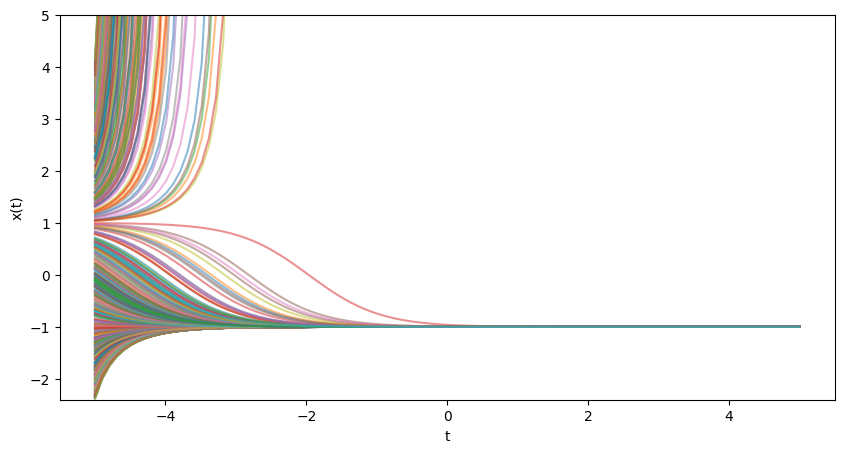

In [87]:
plt.figure(figsize=(10,5))
for m in C
    R1,R2=metodo_RK4((x,i)-> x^2-1,m, linspace(-5,5,100))
    plt.plot(R1,R2,alpha=0.5)
    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.ylim((-2.4,5))
end

__Ejercicio 4:__ También con Runge-Kutta orden $4, $Resuelva numéricamente el sistema:
$$\frac{dx}{dt}=x^2,$$
cual es el punto fijo único?, es un _atractor_ o un _repulsor_?. Utilice de igual forma muchas condiciones iniciales y gráfiquelas en el mismo espacio que en el ejercicio anterior.

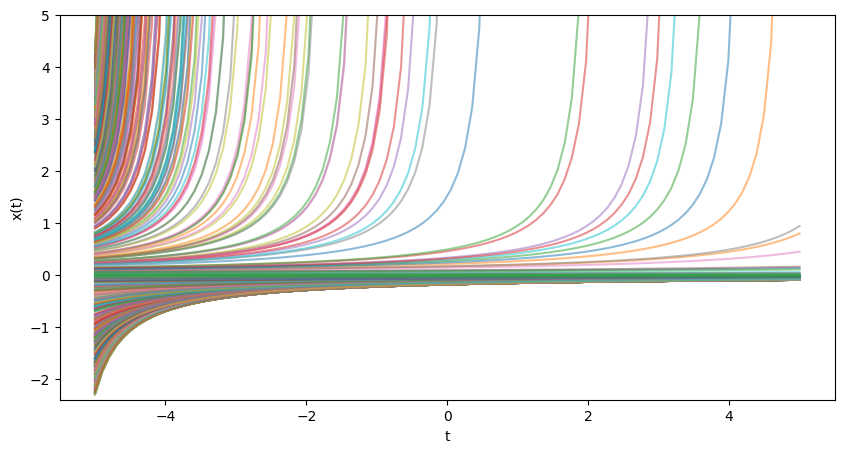

In [88]:
plt.figure(figsize=(10,5))
for m in C
    R1,R2=metodo_RK4((x,i)-> x^2,m, linspace(-5,5,100))
    plt.plot(R1,R2,alpha=0.5)
    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.ylim((-2.4,5))
end

El único punto fijo de este sistema es el $x=0$. En la gráfica se observa que las soluciones tienden a $x=0$ cuando la condición inicial es $x_0 < 0$; mientras que las soluciones tienden a infinito cuando la condición inicial es $x_0 > 0$. Por ello se puede afirmar que el punto fijo es al mismo tiempo un atractor y un repulsor.

__Ejercicio 5:__ Resolver con Runge-Kutta orden $4$ el sistema de ecuaciones:
$$\frac{d\vec x}{dt}=\left(\begin{array}{cc} a & b \\ c & d \end{array}\right)\vec x,$$
donde $\vec x= \left(x(t),y(t)\right)^{\text{T}}.$
Grafique los espacios de fase tomando muchas condiciones iniciales aleatorias y fijando los rangos de los ejes alrededor del origen, de tal forma que se aprecie el compotamiento de las soluciones. Haga esto para los sistemas con:
* $a=b=1$, $c=d=0$
* $a=b=-1$, $c=d=0$
* $a=1$, $b=-2$, $c=d=0$
* $a=1$, $b=-0.5$, $c=d=0$
* $a=d=0$, $b=-c=1$
* $a=d=1$, $b=-c=1$
* $a=d=-1$, $b=-c=1$
* $a=d=-1$, $b=-c=-1$
* $a=b=1$, $b=4,c=-2$
* $a=b=d=-1$, $c=0$

In [109]:
rB = rand(80)
B = 5*rB
C = -B
D = []
for i in B
    push!(D,i)
end
for i in C
    push!(D,i)
end

X = (-2,-1,0,1,2)

(-2, -1, 0, 1, 2)

In [149]:
function G(Arr)
    a=Arr[1]
    b=Arr[2]
    c=Arr[3]
    d=Arr[4]
    plt.figure(figsize=(10,5))
    for j in X
        for m in D
            R1,R2,R3=metodo_RK4_2((x,u,i)->a*x+b*u, (x,u,i)->c*x+d*u, (j,m), linspace(0,4,100))
            plt.plot(R2,R3,alpha=0.5)
        end
    end
    plt.xlim(-4,4)
    plt.ylim(-4,4)
    plt.xlabel("x(t)")
    plt.ylabel("u(t)")
end

G (generic function with 2 methods)

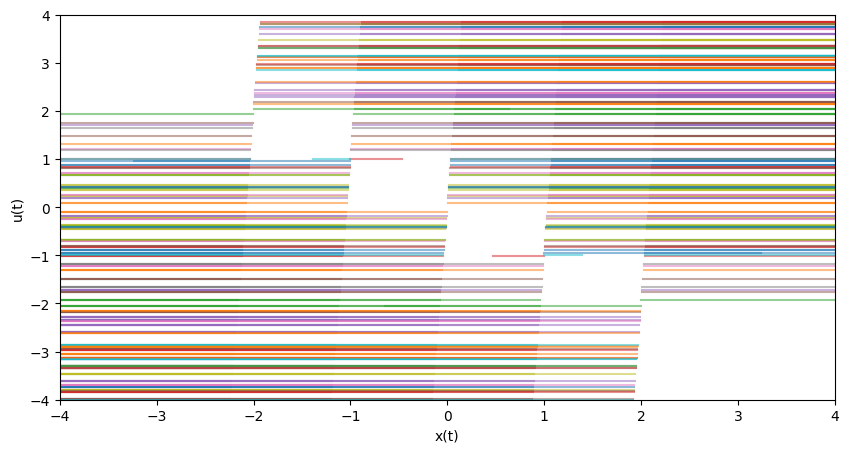

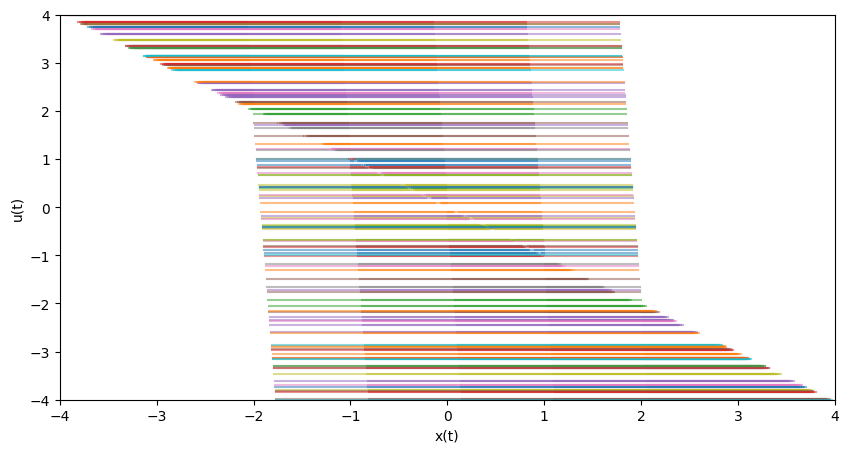

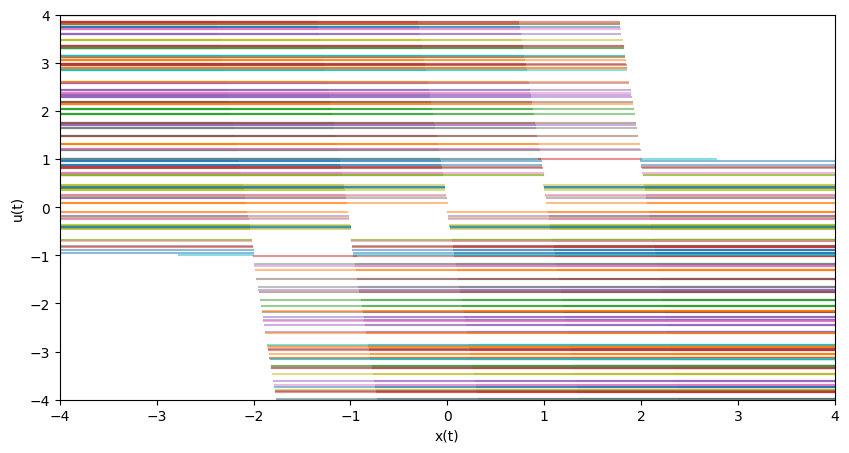

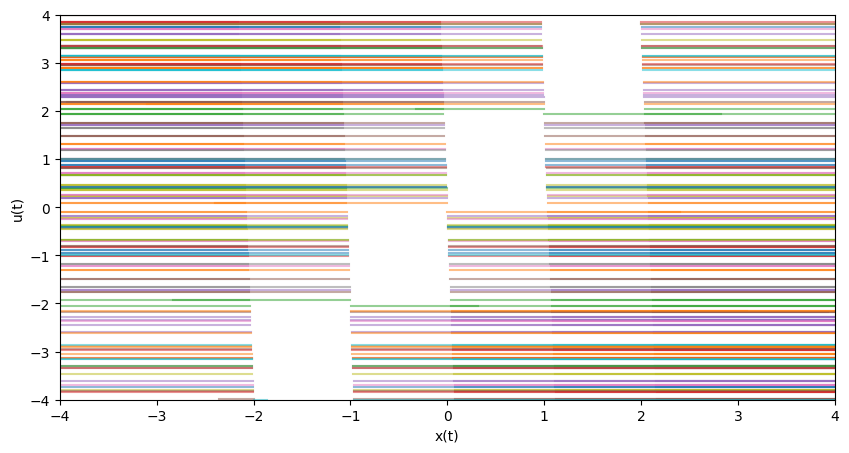

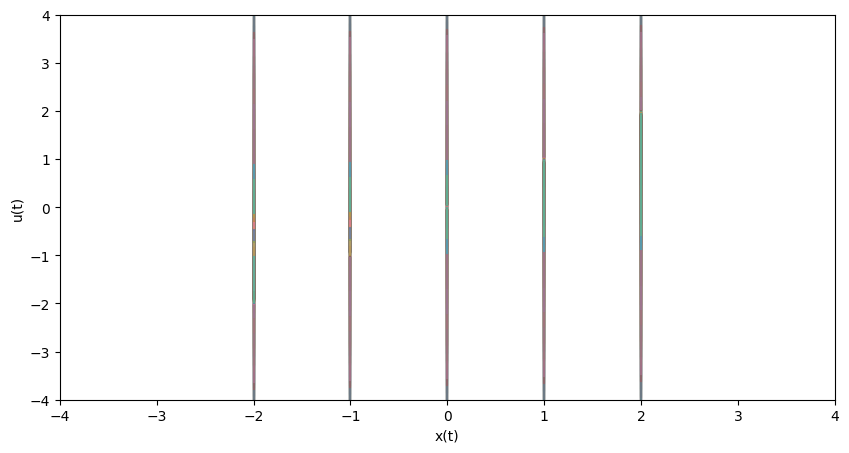

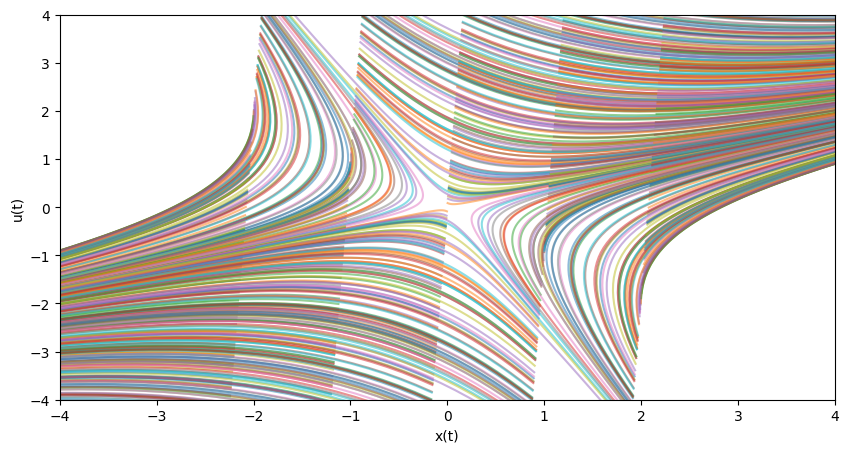

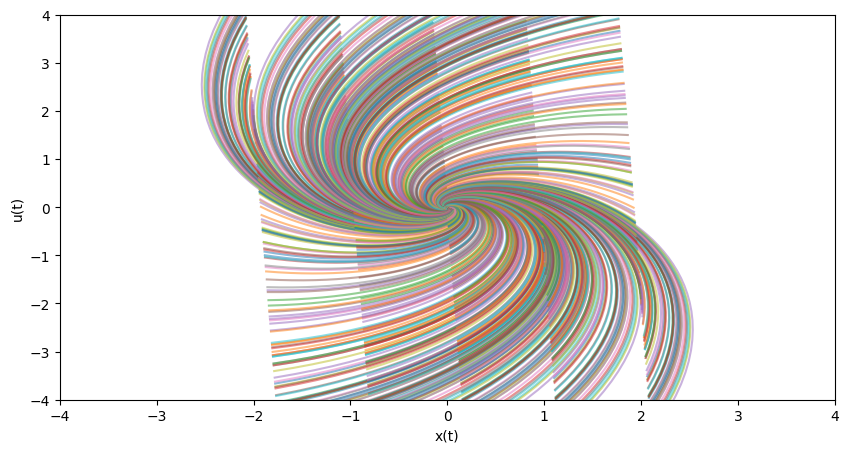

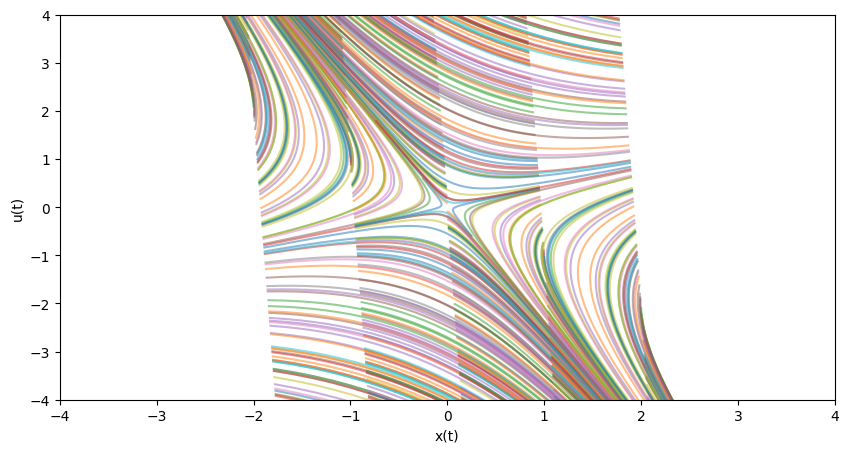

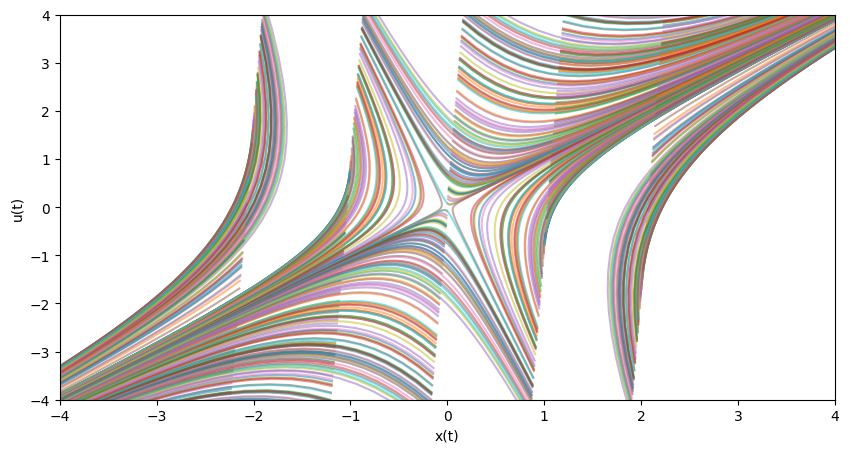

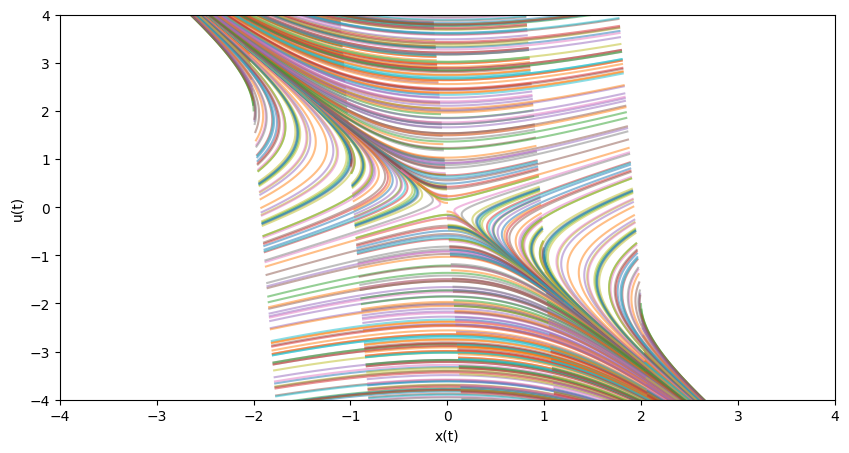

In [150]:
M = ((1,1,0,0),(-1,-1,0,0),(1,-2,0,0),(1,-0.5,0,0),(0,0,1,-1),(1,1,1,-1),(-1,-1,1,-1),(-1,-1,-1,1),(1,1,4,-2),(-1,-1,-1,0))
for i in M 
   G(i)
end